<a href="https://colab.research.google.com/github/rohanreddych/symmetrical-guacamole/blob/master/dib/conv-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
x_list = os.listdir("/content/drive/My Drive/300-pages/split/gray")
y_list = os.listdir("/content/drive/My Drive/300-pages/split/bin")
x_list.sort()
y_list.sort()

In [5]:
print(len(x_list), len(y_list))

5328 5328


In [0]:
X = ["/content/drive/My Drive/300-pages/split/gray/"+i for i in x_list]
y = ["/content/drive/My Drive/300-pages/split/bin/"+i for i in y_list]

In [0]:
def pp(img, label):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=1)
    img = tf.image.resize(img, [128,128])
    #img = tf.reshape(img, [784,])
    img = img / 255.
    lbl = tf.io.read_file(label)
    lbl = tf.image.decode_png(lbl, channels=1)
    lbl = tf.image.resize(lbl,[128,128])
    lbl = lbl / 255.
    lbl = tf.round(lbl)
    return img, lbl

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((X,y))#data

In [0]:
ds2 = dataset.map(pp)

In [0]:
from tensorflow.keras import layers

In [0]:
model2 = tf.keras.models.Sequential([layers.InputLayer(input_shape=(128,128,1)),
                                     layers.Conv2D(64,(3,3),activation="relu", padding="same"),
                                     layers.MaxPool2D((2,2),padding="same"),
                                     layers.Conv2D(32,(3,3),activation="relu", padding="same"),
                                     layers.MaxPool2D((2,2),padding="same"),
                                     layers.Conv2D(16, (3,3), padding="same", activation="relu"),
                                     layers.MaxPool2D((2,2),padding="same"), 
                                     layers.Conv2D(16, (3,3),activation="relu", padding="same"),
                                     layers.UpSampling2D((2,2)),
                                     layers.Conv2D(32, (3,3), activation="relu", padding="same"),
                                     layers.UpSampling2D((2,2)),
                                     layers.Conv2D(64, (3,3), activation="relu", padding="same"),
                                     layers.UpSampling2D((2,2)),
                                     layers.Conv2D(1, (3,3), padding="same"),
])

In [0]:
model2.compile(loss="mse",optimizer="adam")

In [13]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        2

In [0]:
for i, j in ds2.take(2):
    print(j)

In [30]:
ds3 = ds2.batch(16)
model2.fit(ds3, epochs = 10)

Train for 333 steps
Epoch 1/10
333/333 [==============================] - 3643s 11s/step - loss: 0.0704
Epoch 2/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0545
Epoch 3/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0520
Epoch 4/10
333/333 [==============================] - 37s 110ms/step - loss: 0.0492
Epoch 5/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0462
Epoch 6/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0445
Epoch 7/10
333/333 [==============================] - 36s 109ms/step - loss: 0.0432
Epoch 8/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0420
Epoch 9/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0408
Epoch 10/10
333/333 [==============================] - 36s 108ms/step - loss: 0.0398


In [0]:
test_x = []
preds = []
test_y = []
for i,j in ds2.take(10):
    test_x.append(i)
    test_y.append(j)

In [0]:
test_x = tf.reshape(test_x, [10,128,128,1])
preds = model2.predict(test_x)

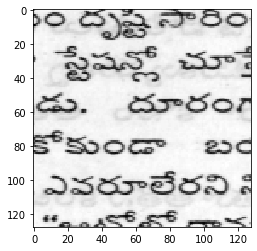

In [43]:
plt.imshow(test_x[7].numpy().reshape(128,128), cmap="gray")

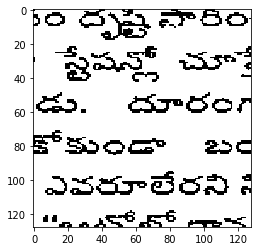

In [44]:
plt.imshow(test_y[7].numpy().reshape(128, 128), cmap="gray")

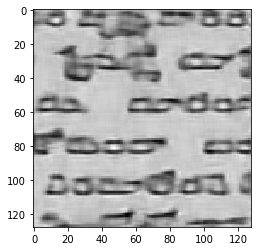

In [46]:
plt.imshow(preds[7].reshape(128,128),cmap="gray")

In [0]:
pp = tf.math.round(preds[7])

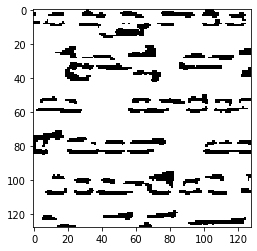

In [49]:
plt.imshow(pp.numpy().reshape(128,128),cmap="gray")